In [1]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import seaborn as sn
import datetime

In [2]:
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

In [9]:
tf.config.experimental.list_physical_devices()

[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU'),
 PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [10]:
tf.test.is_built_with_cuda()

True

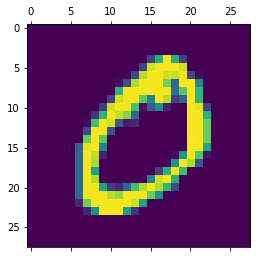

In [3]:
plt.matshow(x_train[1])

In [4]:
print(y_train[1])

0


In [5]:
x_train.shape

x_train = x_train/255
x_test = x_test/255

In [7]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape = (28, 28)),
    keras.layers.Dense(100, activation='relu'),
    keras.layers.Dense(10, activation='sigmoid')
])

log_dir = "logs/adam" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tb_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)

model.compile(
    optimizer = 'adam', 
    loss = 'sparse_categorical_crossentropy',
    metrics = ['accuracy'])

model.fit(x_train, y_train, epochs = 5, callbacks = [tb_callback])

Epoch 1/5
1875/1875 [==============================] - 5s 2ms/step - loss: 0.6463 - accuracy: 0.8358
Epoch 2/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3369 - accuracy: 0.9062
Epoch 3/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2893 - accuracy: 0.9188
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2593 - accuracy: 0.9273
Epoch 5/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2363 - accuracy: 0.9336


In [3]:
%load_ext tensorboard 
%tensorboard --logdir logs/fit

The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


Reusing TensorBoard on port 6006 (pid 12228), started 0:00:59 ago. (Use '!kill 12228' to kill it.)

In [ ]:
model.evaluate(x_test, y_test)

In [ ]:
y_predicted = model.predict(x_test_flat)

In [ ]:
y_predicted_labels = [np.argmax(i) for i in y_predicted]
cm = tf.math.confusion_matrix(labels=y_test, predictions=y_predicted_labels)

In [ ]:

plt.figure(figsize = (10, 7))
sn.heatmap(cm, annot = True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')